# Comparando modelos de Machine Learning en Scikit-learn
Creado por [Kevin Markham](https://github.com/mpfrush/Python-Scikit-Learn-Exercises). Traducido y adaptado por Luis Martínez para Diplomado de Inteligencia Artificial en ITLA.

## Requerimientos
- Acceso a los cuadernos

### Jupyter Notebook
- Instalar Jupyter en PC o
- Correr Colab en Google Drive

### Instalación de Jupyter en PC
- Instalar Anaconda
- Si instaló Anaconda, debe tener ya Jupyter.
- Usar pip install. 
  - "python3 -m pip install jupyter" para Python 3
  - "python -m pip install jupyter" para Python 2
Pueden acceder a: https://jupyter.org/install

### Uso de Google Colab
- Tener cuenta de Google
- Acceder a su Google Drive y crear un cuaderno

## Agenda

- ¿Cómo elijo **qué modelo usar** para mi tarea de aprendizaje supervisado?
- ¿Cómo elijo los **mejores parámetros de ajuste** para ese modelo?
- ¿Cómo calculo el **rendimiento probable de mi modelo** en datos fuera de la muestra?

## Review

- Tarea de clasificación: predecir las especies de iris desconocido
- Se utilizaron tres modelos de clasificación: KNN (K = 1), KNN (K = 5), regresión logística
- Necesita una forma de elegir entre los modelos

**Solución:** Procedimientos de evaluación del modelo

## Proceso de Evaluación #1: Entrenamiento y Prueba en la base de datos entera

1. Entrene el modelo en el **conjunto de datos completo**.
2. Pruebe el modelo en el **mismo conjunto de datos** y evalúe qué tan bien lo hicimos comparando los valores de respuesta **predichos** con los valores de respuesta **verdaderos**.

In [2]:
# TODO: Leer la data desde Scikit learn (desde los datasets internos)
from sklearn.datasets import load_iris
iris = load_iris()

# Crear X (atributo) & y (clase)
X = iris.data
y = iris.target

### Logistic regression

In [12]:
# Importar la clase
from sklearn.linear_model import LogisticRegression

# TODO: Instanciar el modelo (usando parametros por defecto)
logreg = LogisticRegression(max_iter=200)

# TODO: Entrenar el modelo con la data
logreg.fit(X, y)

# TODO: Predecir la clase con las observaciones en X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
# TODO: Almacenar los valores de clases predecidas (usar el método de Scikit Learn para predecir)
y_pred = logreg.predict(X)

# TODO: Comprobar cuántas predicciones se generaron (usar método de python para conocer tamaño de una variable)
len(y_pred)

150

Precisión de clasificación:

- **Proporción** de predicciones correctas
- **Métrica de evaluación** común para problemas de clasificación

In [14]:
# Calcular la precisión de clasificación para el modelo de regresión logística
# TODO: Importar clase de métricas
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


- Conocido como **precisión de entrenamiento** cuando entrena y prueba el modelo con los mismos datos

### KNN (K=5)

In [17]:
# TODO: Importar KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# TODO: Instanciar modelo
knn = KNeighborsClassifier(n_neighbors=5)

# TODO: Entrenar modelo
knn.fit(X, y)

# TODO: Predecir con modelo
y_pred = knn.predict(X)

# TODO: Usar metodo para Precisión de Metrics de SKLEARN
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


### KNN (K=1)

In [18]:
# TODO: Instanciar modelo
knn = KNeighborsClassifier(n_neighbors=1)

# TODO: Entrenar modelo
knn.fit(X, y)

# TODO: Predecir con modelo
y_pred = knn.predict(X)

print(metrics.accuracy_score(y, y_pred))

1.0


### Problemas con el entrenamiento y las pruebas en los mismos datos

- El objetivo es estimar el rendimiento probable de un modelo en **datos fuera de la muestra**
- Pero, maximizar la precisión en entrenamiento genera **modelos demasiado complejos** que no necesariamente generalizarán
- Modelos innecesariamente complejos **sobreajustan/overfit** los datos de entrenamiento

![Overfitting](https://github.com/mpfrush/Python-Scikit-Learn-Exercises/raw/0e26828604b503f0d66a5966de1dce57e5e88c2a/images/05_overfitting.png)

*Image Credit: [Overfitting](http://commons.wikimedia.org/wiki/File:Overfitting.svg#/media/File:Overfitting.svg) by Chabacano. Licensed under GFDL via Wikimedia Commons.*

## Proceso de Evaluación #2: Separación en entrenamiento/prueba

1. Divida el conjunto de datos en dos partes: un **conjunto de entrenamiento** y un **conjunto de prueba**.
2. Entrene al modelo en el **conjunto de entrenamiento**.
3. Pruebe el modelo en el **conjunto de pruebas** y evalúe qué tan bien lo hicimos.

In [19]:
# TODO: Imprimir la forma/dimension de X & y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [20]:
# Paso 1: Separar X & y en conjunto de entrenamiento y prueba
# TODO: Importar metodo para separar en train y test
from sklearn.model_selection import train_test_split

# TODO: Llamar metodo para separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

![Train/test split](https://github.com/mpfrush/Python-Scikit-Learn-Exercises/raw/0e26828604b503f0d66a5966de1dce57e5e88c2a/images/05_train_test_split.png)

¿Qué logró esto?

- El modelo puede ser entrenado y probado en **datos diferentes**
- Los valores de respuesta (clases) son conocidos para el conjunto de pruebas y, por lo tanto, **las predicciones se pueden evaluar**
- **Precisión de prueba** es una mejor estimación que la precisión de entrenamiento del rendimiento fuera de muestra

In [21]:
# TODO: Imprimir la forma/dimension de los nuevos objetos X
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [22]:
# TODO: Imprimir la forma/dimension de los nuevos objetos de y
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [23]:
# Paso 2: Entrenar modelo en conjunto de entrenamiento
logreg = LogisticRegression()

# TODO: Llamar metodo para Entrenar Modelo
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# Paso 3: Hacer predicciones en conjunto de prueba
# TODO: Hacer predicion del modelo
y_pred = logreg.predict(X_test)

# Compare los valores de respuesta reales (y_test) con los valores de respuesta pronosticados (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


Repetir para KNN con K=5:

In [25]:
# TODO: Instanciar KNN
knn = KNeighborsClassifier(n_neighbors=5)

# TODO: Entrenar modelo
knn.fit(X_train, y_train)

# TODO: Predecir con modelo
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


Repetir para KNN con K=1:

In [26]:
# TODO: Instanciar KNN
knn = KNeighborsClassifier(n_neighbors=1)

# TODO: Instanciar modelo
knn.fit(X_train, y_train)

# TODO: Predecir con modelo
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.95


¿Podemos encontrar un valor aún mejor para K?

In [27]:
# Intente K=1 a K=25 y registre la precisión de la prueba
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

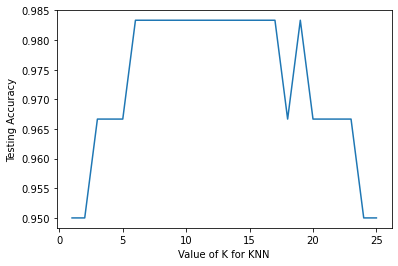

In [34]:
# Importe Matplotlib
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
# %matplotlib inline

# Trazar la relación entre K y la precisión de la prueba
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

- **La precisión del entrenamiento** aumenta a medida que aumenta la complejidad del modelo
- **Precisión de prueba** penaliza los modelos que son demasiado complejos o no lo suficientemente complejos
- Para los modelos KNN, la complejidad está determinada por el valor **de K** (valor más bajo = más complejo)

## Predicciones sobre datos fuera de muestra

In [29]:
# Instanciar el modelo con los parámetros más conocidos
knn = KNeighborsClassifier(n_neighbors=11)

# Entrenar al modelo con X e y (no X_train e y_train)
knn.fit(X, y)

# Hacer una predicción para una observación fuera de muestra
knn.predict([[3, 5, 4, 2]])

array([1])

## ¿Desventajas de la división de entrenamiento/prueba?

- Proporciona una **estimación de alta varianza** de precisión para datos fuera de muestra
- **La validación cruzada K-fold** supera esta limitación
- Pero, la división de tren / prueba sigue siendo útil debido a su **flexibilidad y velocidad**

## Recursos

- Quora: [Explicación intuitiva de Overfitting (en Inglés)](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)
- Video: [Visualización de Sesgo y Varianza (en Inglés)](http://work.caltech.edu/library/081.html) (15 minutos) por Abu-Mostafa